<a href="https://colab.research.google.com/github/NikethML/houseregression/blob/main/houseres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Package imports needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy


In [3]:
url='https://raw.githubusercontent.com/NikethML/houseregression/main/houseRegressionStudents%20(1)%20(1).csv'
df= pd.read_csv(url)

In [4]:
df.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [5]:
df.describe()

,Unnamed: 0,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,729.500000,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,0.000000,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,364.750000,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,729.500000,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.250000,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1459.000000,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1460 non-null   int64 
 1   Id             1460 non-null   int64 
 2   MSSubClass     1460 non-null   int64 
 3   MSZoning       1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   int64 
 17  OverallCond    1460 non-null   int64 
 18  YearBuilt      1460 non-null

In [11]:
df.columns

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [12]:
df_categorical = df.select_dtypes(include='object')


In [14]:
df_numerical = df.select_dtypes(exclude='object')


In [15]:
corr = df_numerical.corr()
corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Unnamed: 0,1.000000,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
Id,1.000000,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.033226,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
BsmtFinSF1,-0.005024,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,-0.005968,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [16]:
# Convert correlation matrix to 1-D Series and sort
sorted_mat = corr.unstack().sort_values()
  
print(sorted_mat)

BsmtFinSF1    BsmtUnfSF       -0.495251
BsmtUnfSF     BsmtFinSF1      -0.495251
              BsmtFullBath    -0.422900
BsmtFullBath  BsmtUnfSF       -0.422900
YearBuilt     EnclosedPorch   -0.387268
                                 ...   
BedroomAbvGr  BedroomAbvGr     1.000000
HalfBath      HalfBath         1.000000
FullBath      FullBath         1.000000
BsmtFullBath  BsmtFullBath     1.000000
SalePrice     SalePrice        1.000000
Length: 1296, dtype: float64


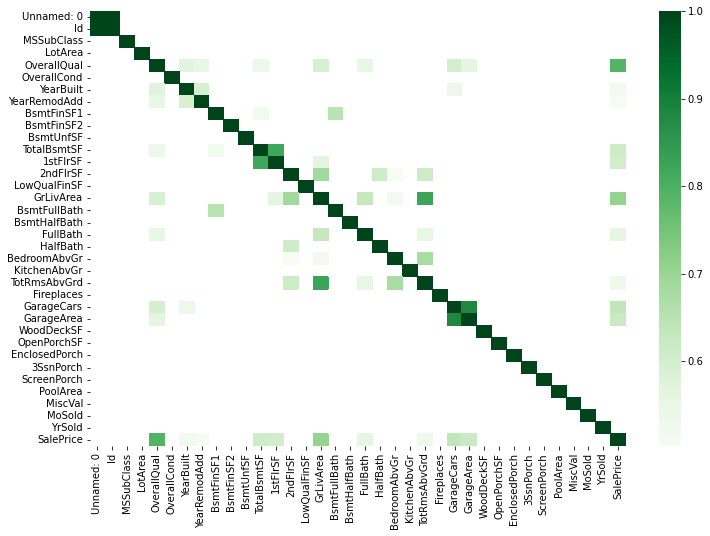

In [19]:
corr = df_numerical.corr()

kot = corr[corr>=.5]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [22]:
df.columns

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [23]:
df.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [25]:
df['OverallQual']

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64

In [24]:
df['GrLivArea']

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

In [26]:
df_fc=df[['OverallQual','SalePrice']]

In [27]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
scaled = sc.fit_transform(df_fc)

df_scaled=pd.DataFrame(scaled, columns =['OverallQual', 'SalePrice'])
df_scaled.head()

,OverallQual,SalePrice
0,0.651479,0.347273
1,-0.071836,0.007288
2,0.651479,0.536154
3,0.651479,-0.515281
4,1.374795,0.869843


In [30]:
X = np.array(df_scaled['OverallQual']).reshape(-1, 1)

y = np.array(df_scaled['SalePrice']).reshape(-1, 1)

In [31]:
#Splitting with 75% training, 25% testing data
x_train, x_test, y_train, y_test = train_test_split(X,y , train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)

In [39]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn import preprocessing

In [40]:
regr = LinearRegression()


In [41]:
# fitting the model
regr.fit(x_train, y_train)
  
# making predictions
predictions = regr.predict(x_test)
  
# model evaluation
score=r2_score(y_test,predictions)
print('r2 score is ',score)
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))


r2 score is  0.6571679676129542
mean_squared_error :  0.36335765228934735
mean_absolute_error :  0.40641730928384623


In [42]:
df_na=df[['GrLivArea','SalePrice']]

In [47]:
sc=StandardScaler()
scaled = sc.fit_transform(df_na)

df_scaled=pd.DataFrame(scaled, columns =['GrLivArea', 'SalePrice'])
df_scaled.head()

,GrLivArea,SalePrice
0,0.370333,0.347273
1,-0.482512,0.007288
2,0.515013,0.536154
3,0.383659,-0.515281
4,1.299326,0.869843


In [48]:
X = np.array(df_scaled['GrLivArea']).reshape(-1, 1)

y = np.array(df_scaled['SalePrice']).reshape(-1, 1)
#Splitting with 75% training, 25% testing data
x_train, x_test, y_train, y_test = train_test_split(X,y , train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)
# fitting the model
regr.fit(x_train, y_train)
  
# making predictions
predictions = regr.predict(x_test)
  
# model evaluation
score=r2_score(y_test,predictions)
print('r2 score is ',score)
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))


r2 score is  0.5430950402705792
mean_squared_error :  0.4842602143407948
mean_absolute_error :  0.45955937756668697


In [54]:
df.columns

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [55]:
df_xy=df[['TotalBsmtSF','SalePrice']]

In [56]:
sc=StandardScaler()
scaled = sc.fit_transform(df_xy)

df_scaled=pd.DataFrame(scaled, columns =['TotalBsmtSF', 'SalePrice'])
df_scaled.head()

,TotalBsmtSF,SalePrice
0,-0.459303,0.347273
1,0.466465,0.007288
2,-0.313369,0.536154
3,-0.687324,-0.515281
4,0.199680,0.869843


In [58]:
X = np.array(df_scaled['TotalBsmtSF']).reshape(-1, 1)

y = np.array(df_scaled['SalePrice']).reshape(-1, 1)
#Splitting with 75% training, 25% testing data
x_train, x_test, y_train, y_test = train_test_split(X,y , train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)
# fitting the model
regr.fit(x_train, y_train)
  
# making predictions
predictions = regr.predict(x_test)
  
# model evaluation
score=r2_score(y_test,predictions)
print('r2 score is ',score)
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))


r2 score is  0.38316865328032135
mean_squared_error :  0.6537615182629818
mean_absolute_error :  0.6017659039476588


In [60]:
df_ga=df[['GarageArea','SalePrice']]

In [61]:
sc=StandardScaler()
scaled = sc.fit_transform(df_xy)

df_scaled=pd.DataFrame(scaled, columns =['GarageArea', 'SalePrice'])
df_scaled.head()

,GarageArea,SalePrice
0,-0.459303,0.347273
1,0.466465,0.007288
2,-0.313369,0.536154
3,-0.687324,-0.515281
4,0.199680,0.869843


In [62]:
X = np.array(df_scaled['GarageArea']).reshape(-1, 1)

y = np.array(df_scaled['SalePrice']).reshape(-1, 1)
#Splitting with 75% training, 25% testing data
x_train, x_test, y_train, y_test = train_test_split(X,y , train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)
# fitting the model
regr.fit(x_train, y_train)
  
# making predictions
predictions = regr.predict(x_test)
  
# model evaluation
score=r2_score(y_test,predictions)
print('r2 score is ',score)
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))


r2 score is  0.38316865328032135
mean_squared_error :  0.6537615182629818
mean_absolute_error :  0.6017659039476588


In [66]:
df_ga=df[['GarageArea','SalePrice']]
sc=StandardScaler()
scaled = sc.fit_transform(df_ga)

df_scaled=pd.DataFrame(scaled, columns =['GarageArea', 'SalePrice'])
df_scaled.head()

X = np.array(df_scaled['GarageArea']).reshape(-1, 1)

y = np.array(df_scaled['SalePrice']).reshape(-1, 1)
#Splitting with 75% training, 25% testing data
x_train, x_test, y_train, y_test = train_test_split(X,y , train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)
# fitting the model
regr.fit(x_train, y_train)
  
# making predictions
predictions = regr.predict(x_test)
  
# model evaluation
score=r2_score(y_test,predictions)
print('r2 score is ',score)
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))



r2 score is  0.3631161559275389
mean_squared_error :  0.675014574198022
mean_absolute_error :  0.5540673207333072


In [63]:
df.columns

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [65]:
df_ga=df[['PoolArea','SalePrice']]
sc=StandardScaler()
scaled = sc.fit_transform(df_ga)

df_scaled=pd.DataFrame(scaled, columns =['PoolArea', 'SalePrice'])
df_scaled.head()

X = np.array(df_scaled['PoolArea']).reshape(-1, 1)

y = np.array(df_scaled['SalePrice']).reshape(-1, 1)
#Splitting with 75% training, 25% testing data
x_train, x_test, y_train, y_test = train_test_split(X,y , train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)
# fitting the model
regr.fit(x_train, y_train)
  
# making predictions
predictions = regr.predict(x_test)
  
# model evaluation
score=r2_score(y_test,predictions)
print('r2 score is ',score)
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))



r2 score is  -0.012723430078831699
mean_squared_error :  1.0733559679639892
mean_absolute_error :  0.7314858723042419


In [76]:
score_poolarea=-0.0127
score_Garagearea=0.363
score_Garlivarea=0.543
score_OvarallQual=0.65
score_basementarea=0.38


data = {'poolarea':-0.0127, 'Garagearea':0.363, 'Garlivarea':0.543,
        'OvarallQual':0.65,'basementarea':0.363}
Dependent_var = list(data.keys())
values = list(data.values())


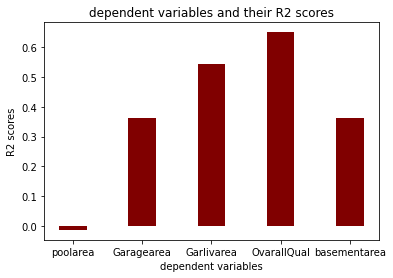

In [77]:

plt.bar(Dependent_var, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("dependent variables")
plt.ylabel("R2 scores")
plt.title("dependent variables and their R2 scores")
plt.show()